In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Feature Scaling
I will explore some basic feature scaling practices.


### Data Set
First, let's define a simple data set

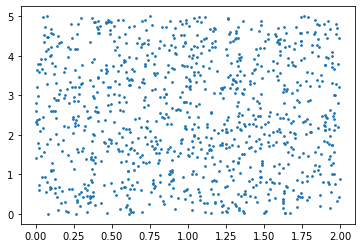

In [2]:
x = np.random.uniform(0, 2, 1000)
y = np.random.uniform(0, 5, 1000)
plt.scatter(x, y, s=3)

Above we have a simple set of uniformly distributed data where the y-axis ranges from 1 to 100 and the x-axis ranges from 1 to 5

In [3]:
print(f"The mean of x is {x.mean()}")
print(f"The standard deviation of x is {x.std()}")

print(f"The mean of y is {y.mean()}")
print(f"The standard deviation of y is {y.std()}")

The mean of x is 1.0087232477974524
The standard deviation of x is 0.5667820846903235
The mean of y is 2.485712103067941
The standard deviation of y is 1.436780132265071


# Rescaling (min-max normalization)

We will do the following operation:

$$
x'=\dfrac{x - \text{min}(x)}{\text{max}(x) - \text{min}(x)}
$$

In [4]:
def rescaler(data, array):
    return (data - min(array))/(max(array) - min(array))

In [5]:
x_minmax = rescaler(x, x)
y_minmax = rescaler(y, y)

Below is the scatter plot of the original and rescaled data on the same plot

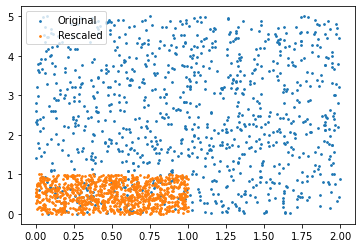

In [22]:
fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(x, y, s=3, label='Original')
ax1.scatter(x_minmax, y_minmax, s=3, label='Rescaled')
plt.legend(loc='upper left');
plt.show()

####  What happens to the mean and standard deviation?
The scatter plot shows that the data has the same distribution, just on a different scale. 

In [7]:
print(f"The mean of the rescaled x is {x_minmax.mean()}")
print(f"The mean of the rescaled y is {y_minmax.mean()}")
print("Now obseve the following")
print(rescaler(x.mean(), x))
print(rescaler(y.mean(), y))

The mean of the rescaled x is 0.5047374065665857
The mean of the rescaled y is 0.4970857840381202
Now obseve the following
0.5047374065665858
0.49708578403812015


Note that rescaling the mean of the feature is the same as the mean of the rescaled feature

In [8]:
print(f"The standard deviation of the rescaled x is {x_minmax.std()}")
print(f"The standard deviation of the rescaled y is {y_minmax.std()}")
print("Now observe the following")
print(rescaler(x.std(), x))
print(rescaler(y.std(), y))

The standard deviation of the rescaled x is 0.2837762899952182
The standard deviation of the rescaled y is 0.2874388773648859
Now obseve the following
0.2834664330296663
0.28723890395606044


Note that rescaling the standard deviation of the feature is very close to the standard deviation of the rescaled feature

# Mean normalization

We will do the following operation:

$$
x'=\dfrac{x - \text{average}(x)}{\text{max}(x) - \text{min}(x)}
$$

In [9]:
def norm(data, array):
    return (data - array.mean())/(max(array) - min(array))

In [10]:
x_norm = norm(x,x)
y_norm = norm(y,y)

Below is the scatter plot of the original and mean normalized data on the same plot

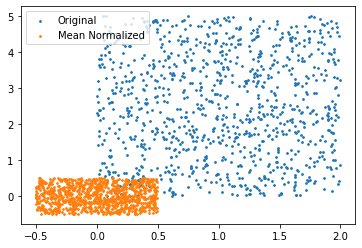

In [11]:
fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(x, y, s=3, label='Original')
ax1.scatter(x_norm, y_norm, s=3, label='Mean Normalized')
plt.legend(loc='upper left');
plt.show()

Mean normalizing is similar to rescaling, except the data is adjusted so that it is centered around the origin. We may now hypothesize that the mean of the mean normalized feature will be zero.

####  What happens to the mean?

In [40]:
print(f"The mean of the mean normalized x is {x_norm.mean()}")
print(f"The mean of the mean noramlized y is {y_norm.mean()}")

The mean of the mean normalized x is -8.881784197001253e-18
The mean of the mean noramlized y is 4.4408920985006264e-17


Therefore the mean of the mean normalized feature is extremely close to 0. 

#### What about Standard Deviation?

In [39]:
print(f"The standard deviation of the mean normalized x is {x_norm.std()}")
print(f"The standard deviation of the mean noramlized y is {y_norm.std()}")

The standard deviation of the mean normalized x is 0.28377628999521826
The standard deviation of the mean noramlized y is 0.2874388773648858


It is striking that the standard deviation of the rescaled and mean normalized features are the same. How come? I am guessing that the distributions of the data remains the same between rescaled or mean normalized features. The only difference would be that the mean normalized feature has a mean of zero. In other words the distances between the data points remains the same, the difference is that the mean normalized feature is positioned on the xy-axis to have a mean of zero. There is one assumption being made here. The size of the interval onto which the data is mapped is the same (in the case of [0,1] or [-0.5,0.5] the size is 1).

# Standardization (z-score Normalization)

We will do the following operation:

$$
x'=\dfrac{x - \text{average}(x)}{\text{std}(x)}
$$

In [31]:
def z_score(data, array):
    return (data - array.mean())/array.std()

In [32]:
x_std = z_score(x,x)
y_std = z_score(y,y)

Below is the scatter plot of the original and standardized data on the same plot

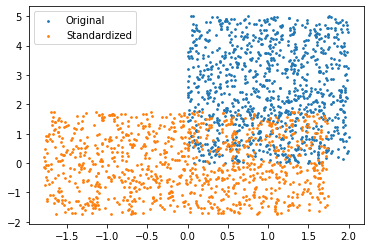

In [44]:
fig = plt.figure()
ax1 = fig.add_subplot()

ax1.scatter(x, y, s=3, label='Original')
ax1.scatter(x_std, y_std, s=3, label='Standardized')
plt.legend(loc='upper left');
plt.show()

####  What happens to the mean?

In [41]:
print(f"The mean of the standardized x is {x_std.mean()}")
print(f"The mean of the standardized y is {y_std.mean()}")

The mean of the standardized x is -3.907985046680551e-17
The mean of the standardized y is 1.5631940186722203e-16


Therefore the mean of the standardized feature is extremely close to 0. 

#### What about Standard Deviation?

In [43]:
print(f"The standard deviation of the mean normalized x is {x_std.std()}")
print(f"The standard deviation of the mean noramlized y is {y_std.std()}")

The standard deviation of the mean normalized x is 1.0
The standard deviation of the mean noramlized y is 1.0


Therefore the standard deviation of the standardized feature is 1. 